In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

def func(x,m,b):
    return m*x + b

In [8]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_20240624_9bvals.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'TrueData_sorted') 
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})


In [9]:

#give name of error
def CalculatePE_fraction(df, trait):
    df[trait + ' PE'] = (df['Fit ' + trait]-df['true ' + trait])#*100/(df['true ' + trait])
    return df

def CalculatePE_diffusion(df, trait): #scale by 1000
    df[trait + ' PE'] = ((df['Fit ' +trait]/1000)-df['true ' + trait])#*100/(df['true ' + trait])
    return df


# First true data with no noise...

In [10]:
df_TrueData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_TrueData = CalculatePE_fraction(df_TrueData, 'fast fraction')
df_TrueData = CalculatePE_fraction(df_TrueData, 'med fraction')
df_TrueData = CalculatePE_fraction(df_TrueData, 'slow fraction')
df_TrueData = CalculatePE_diffusion(df_TrueData, 'fast diffusion')
df_TrueData = CalculatePE_diffusion(df_TrueData, 'med diffusion')
df_TrueData = CalculatePE_diffusion(df_TrueData, 'slow diffusion')

# now also sort it... 


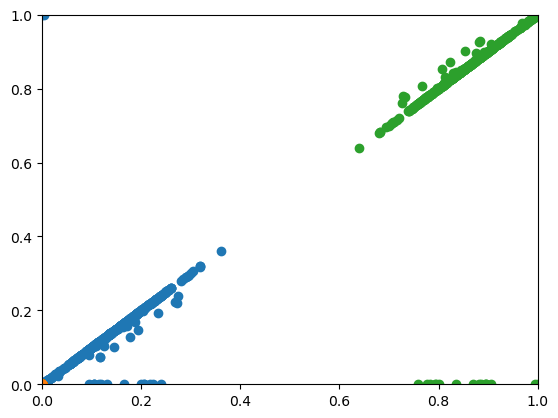

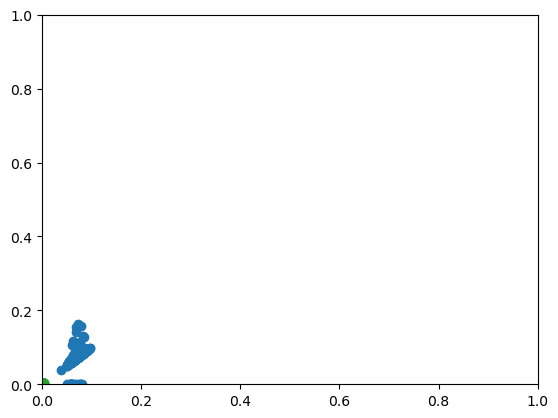

In [11]:
pl.scatter(df_TrueData['true fast fraction'],df_TrueData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_TrueData['true med fraction'],df_TrueData['Fit med fraction'], label = 'fast fraction')

pl.scatter(df_TrueData['true slow fraction'],df_TrueData['Fit slow fraction'], label = 'fast fraction')
pl.xlim(0,1)
pl.ylim(0,1)
pl.show()

pl.scatter(df_TrueData['true fast diffusion'],df_TrueData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_TrueData['true med diffusion'],df_TrueData['Fit med diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_TrueData['true slow diffusion'],df_TrueData['Fit slow diffusion']/1000, label = 'fast diffusion')
pl.xlim(0,1)
pl.ylim(0,1)
pl.show()



# now the effect of combined fD!

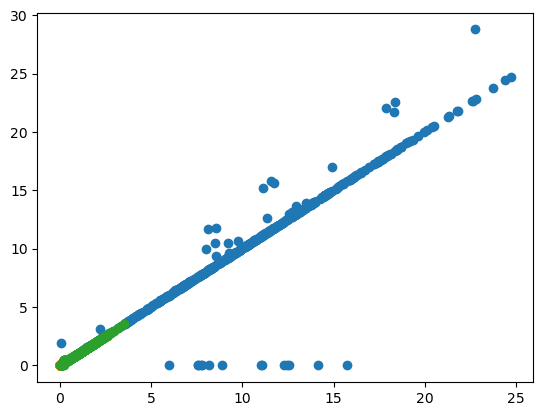

In [12]:
TruefastfDs = 1000*df_TrueData['true fast fraction']*df_TrueData['true fast diffusion']
TruemedfDs = 1000*df_TrueData['true med fraction']*df_TrueData['true med diffusion']
TrueslowfDs = 1000*df_TrueData['true slow fraction']*df_TrueData['true slow diffusion']

FitfastfDs = df_TrueData['Fit fast fraction']*df_TrueData['Fit fast diffusion']
FitmedfDs = df_TrueData['Fit med fraction']*df_TrueData['Fit med diffusion']
FitslowfDs = df_TrueData['Fit slow fraction']*df_TrueData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)
pl.show()

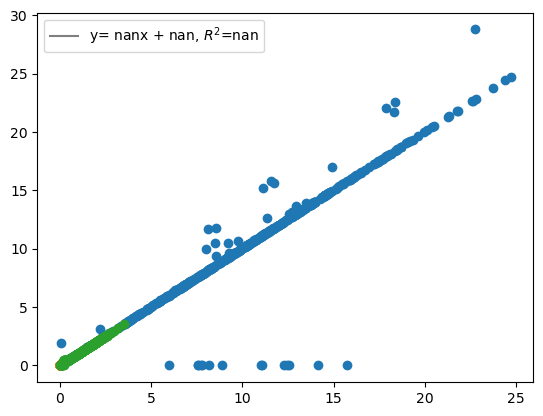

SignificanceResult(statistic=nan, pvalue=nan)
All fD difference = nan ± nan, nan%
fast fD difference = -0.13824 ± 1.86604, 0.45628%
med fD difference = 0.00000 ± 0.00000, nan%
slow fD difference = 0.00556 ± 0.03723, nan%


In [13]:
TruefastfDs = 1000*df_TrueData['true fast fraction']*df_TrueData['true fast diffusion']
TruemedfDs = 1000*df_TrueData['true med fraction']*df_TrueData['true med diffusion']
TrueslowfDs = 1000*df_TrueData['true slow fraction']*df_TrueData['true slow diffusion']

FitfastfDs = df_TrueData['Fit fast fraction']*df_TrueData['Fit fast diffusion']
FitmedfDs = df_TrueData['Fit med fraction']*df_TrueData['Fit med diffusion']
FitslowfDs = df_TrueData['Fit slow fraction']*df_TrueData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.mean((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now with averaged.... gonna be worse.

In [19]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/SimulatedDiffusionSpectra_Fits_20240624_9bvals.xlsx'
AveragedDataFits = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_sorted') 
AveragedDataFits=AveragedDataFits.rename(columns={c: 'Fit '+c for c in AveragedDataFits.columns if c not in ['Run Number', 'Unnamed']})


In [20]:
df_AveragedData = pd.merge(Truth, AveragedDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')

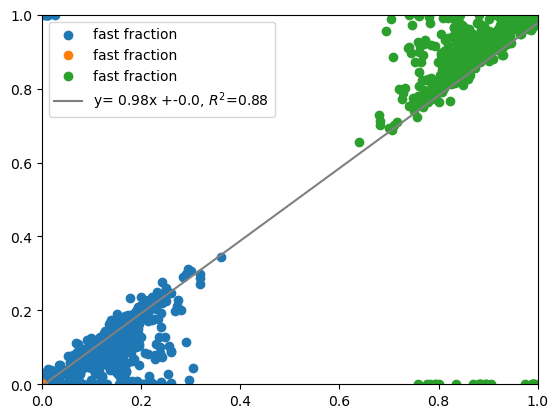

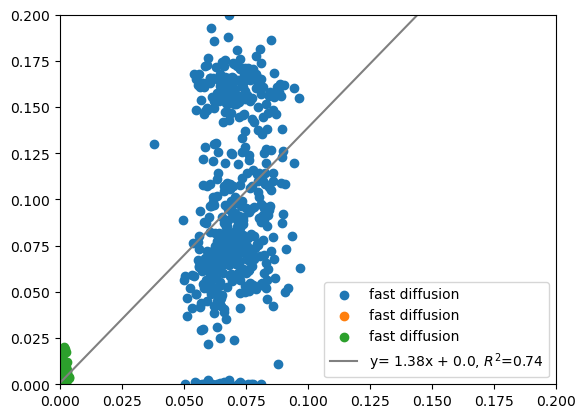

In [21]:
pl.scatter(df_AveragedData['true fast fraction'],df_AveragedData['Fit fast fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true med fraction'],df_AveragedData['Fit med fraction'], label = 'fast fraction')

pl.scatter(df_AveragedData['true slow fraction'],df_AveragedData['Fit slow fraction'], label = 'fast fraction')
pl.xlim(0,1)
pl.ylim(0,1)


AllTruef = np.array(list(df_AveragedData['true fast fraction'])+list(df_AveragedData['true med fraction'])+list(df_AveragedData['true slow fraction']))
allFitf = np.array(list(df_AveragedData['Fit fast fraction'])+list(df_AveragedData['Fit med fraction'])+list(df_AveragedData['Fit slow fraction']))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruef,allFitf)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()

pl.scatter(df_AveragedData['true fast diffusion'],df_AveragedData['Fit fast diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true med diffusion'],df_AveragedData['Fit med diffusion']/1000, label = 'fast diffusion')

pl.scatter(df_AveragedData['true slow diffusion'],df_AveragedData['Fit slow diffusion']/1000, label = 'fast diffusion')
pl.xlim(0,.2)
pl.ylim(0,.2)

AllTrueD = np.array(list(df_AveragedData['true fast diffusion'])+list(df_AveragedData['true med diffusion'])+list(df_AveragedData['true slow diffusion']))
allFitD = np.array(list(df_AveragedData['Fit fast diffusion'])+list(df_AveragedData['Fit med diffusion'])+list(df_AveragedData['Fit slow diffusion']))/1000

x = np.linspace(0,.2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTrueD,allFitD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
pl.show()



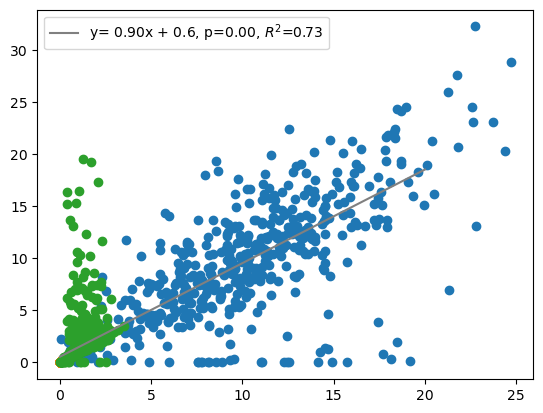

SignificanceResult(statistic=0.9104977429718429, pvalue=0.0)
All fD difference = 0.17213 ± 2.90744, nan%
fast fD difference = -0.42955 ± 4.18254, 22.15122%
med fD difference = 0.00000 ± 0.00000, nan%
slow fD difference = 0.94593 ± 2.62214, 10.57143%


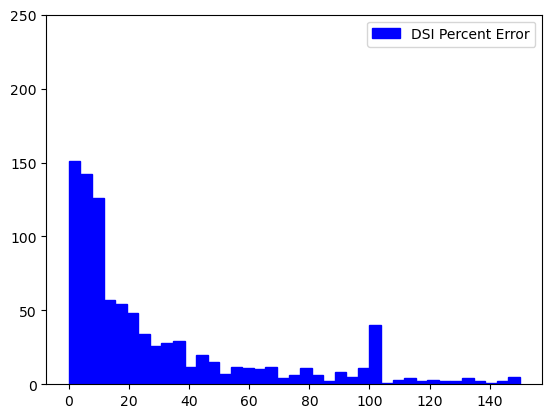

nan


In [22]:
TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs)
pl.scatter(TruemedfDs,FitmedfDs)
pl.scatter(TrueslowfDs,FitslowfDs)


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.2f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median(np.abs((allFitfD - AllTruefD))/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs - TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs - TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs - TrueslowfDs))/TrueslowfDs):.5f}%')

pl.hist(100*np.abs((allFitfD - AllTruefD))/AllTruefD,bins = np.linspace(0,150,40),facecolor='blue',edgecolor='blue', label = 'DSI Percent Error')
pl.ylim(0,250)
pl.legend()
pl.show()
print(np.mean(100*np.abs((allFitfD - AllTruefD))/AllTruefD))
